# Загрузка зависимостей

In [169]:
pip install catboost

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

# Анализ и обработка данных

In [171]:
data = pd.read_csv('train.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

Видно, что скорее всего существуют как множество полностью пустые строки, так и множество частично пустых по одним и тем же признакам.

Посмотрим на корреляцию null-значений:

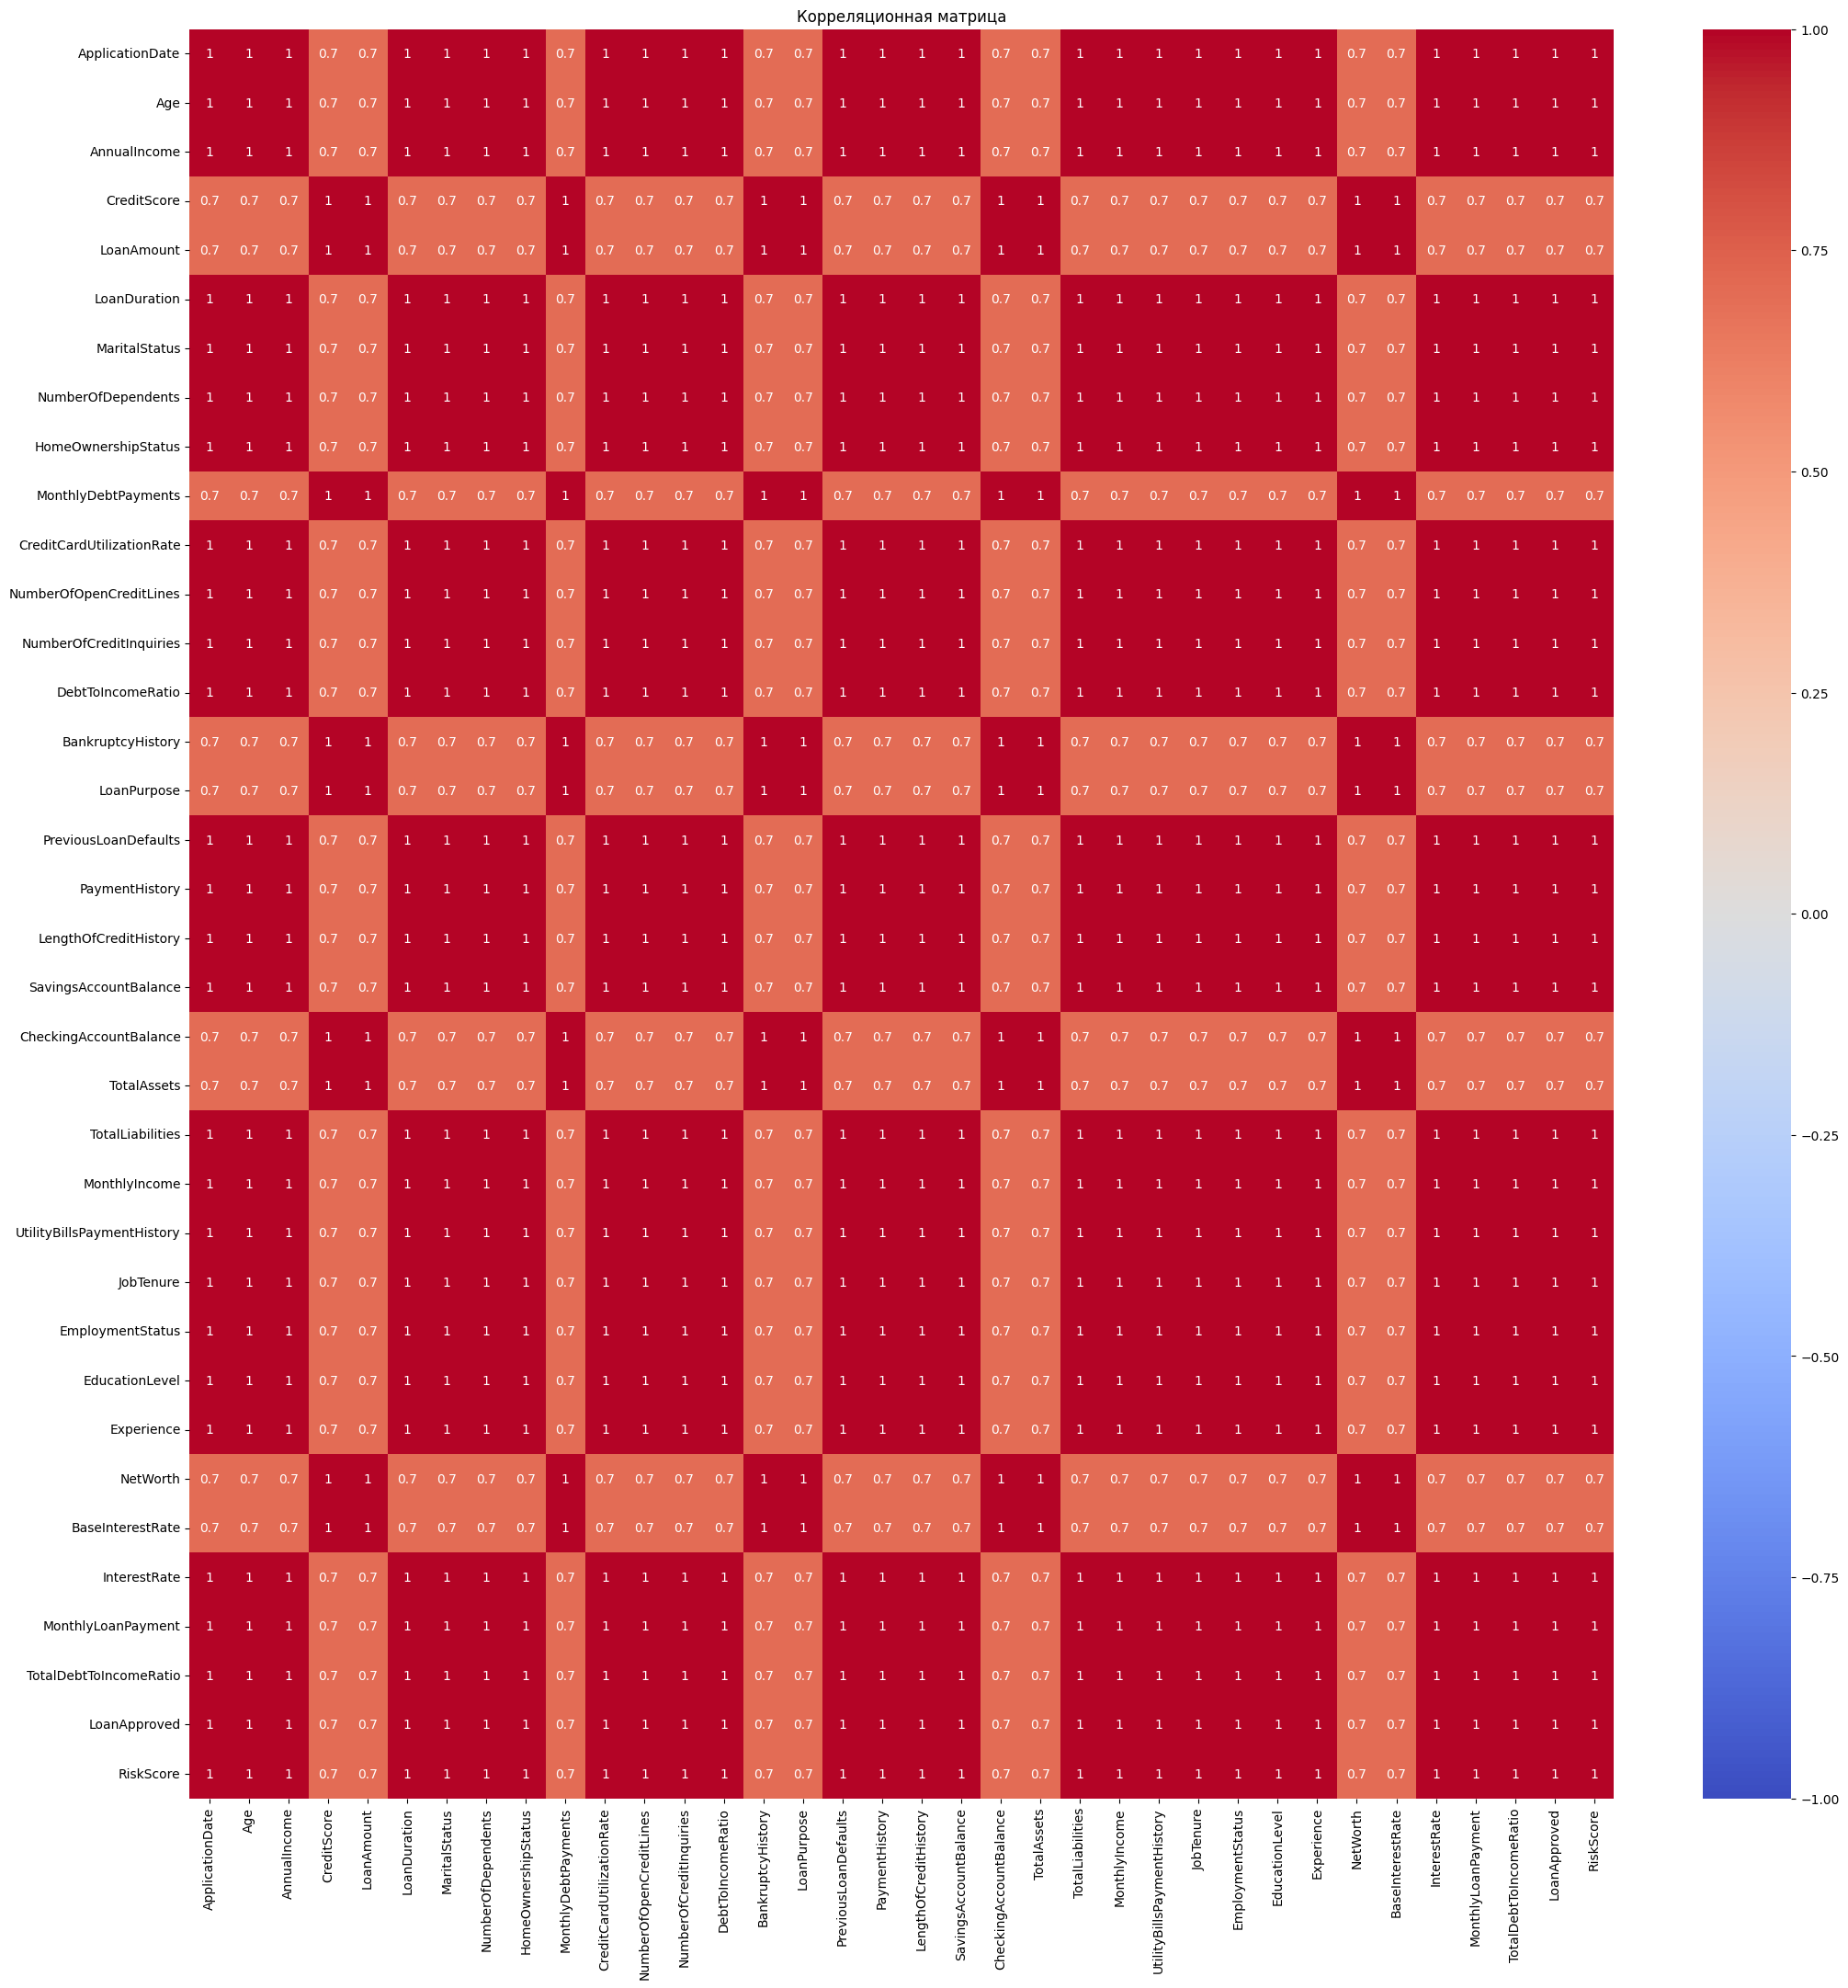

In [173]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.isnull().corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

Заметим, что видно как и множество просто пустых строк, так и множество строк с одинаковыми пустыми признаками, что будет вижно на следующей матрице корреляции.

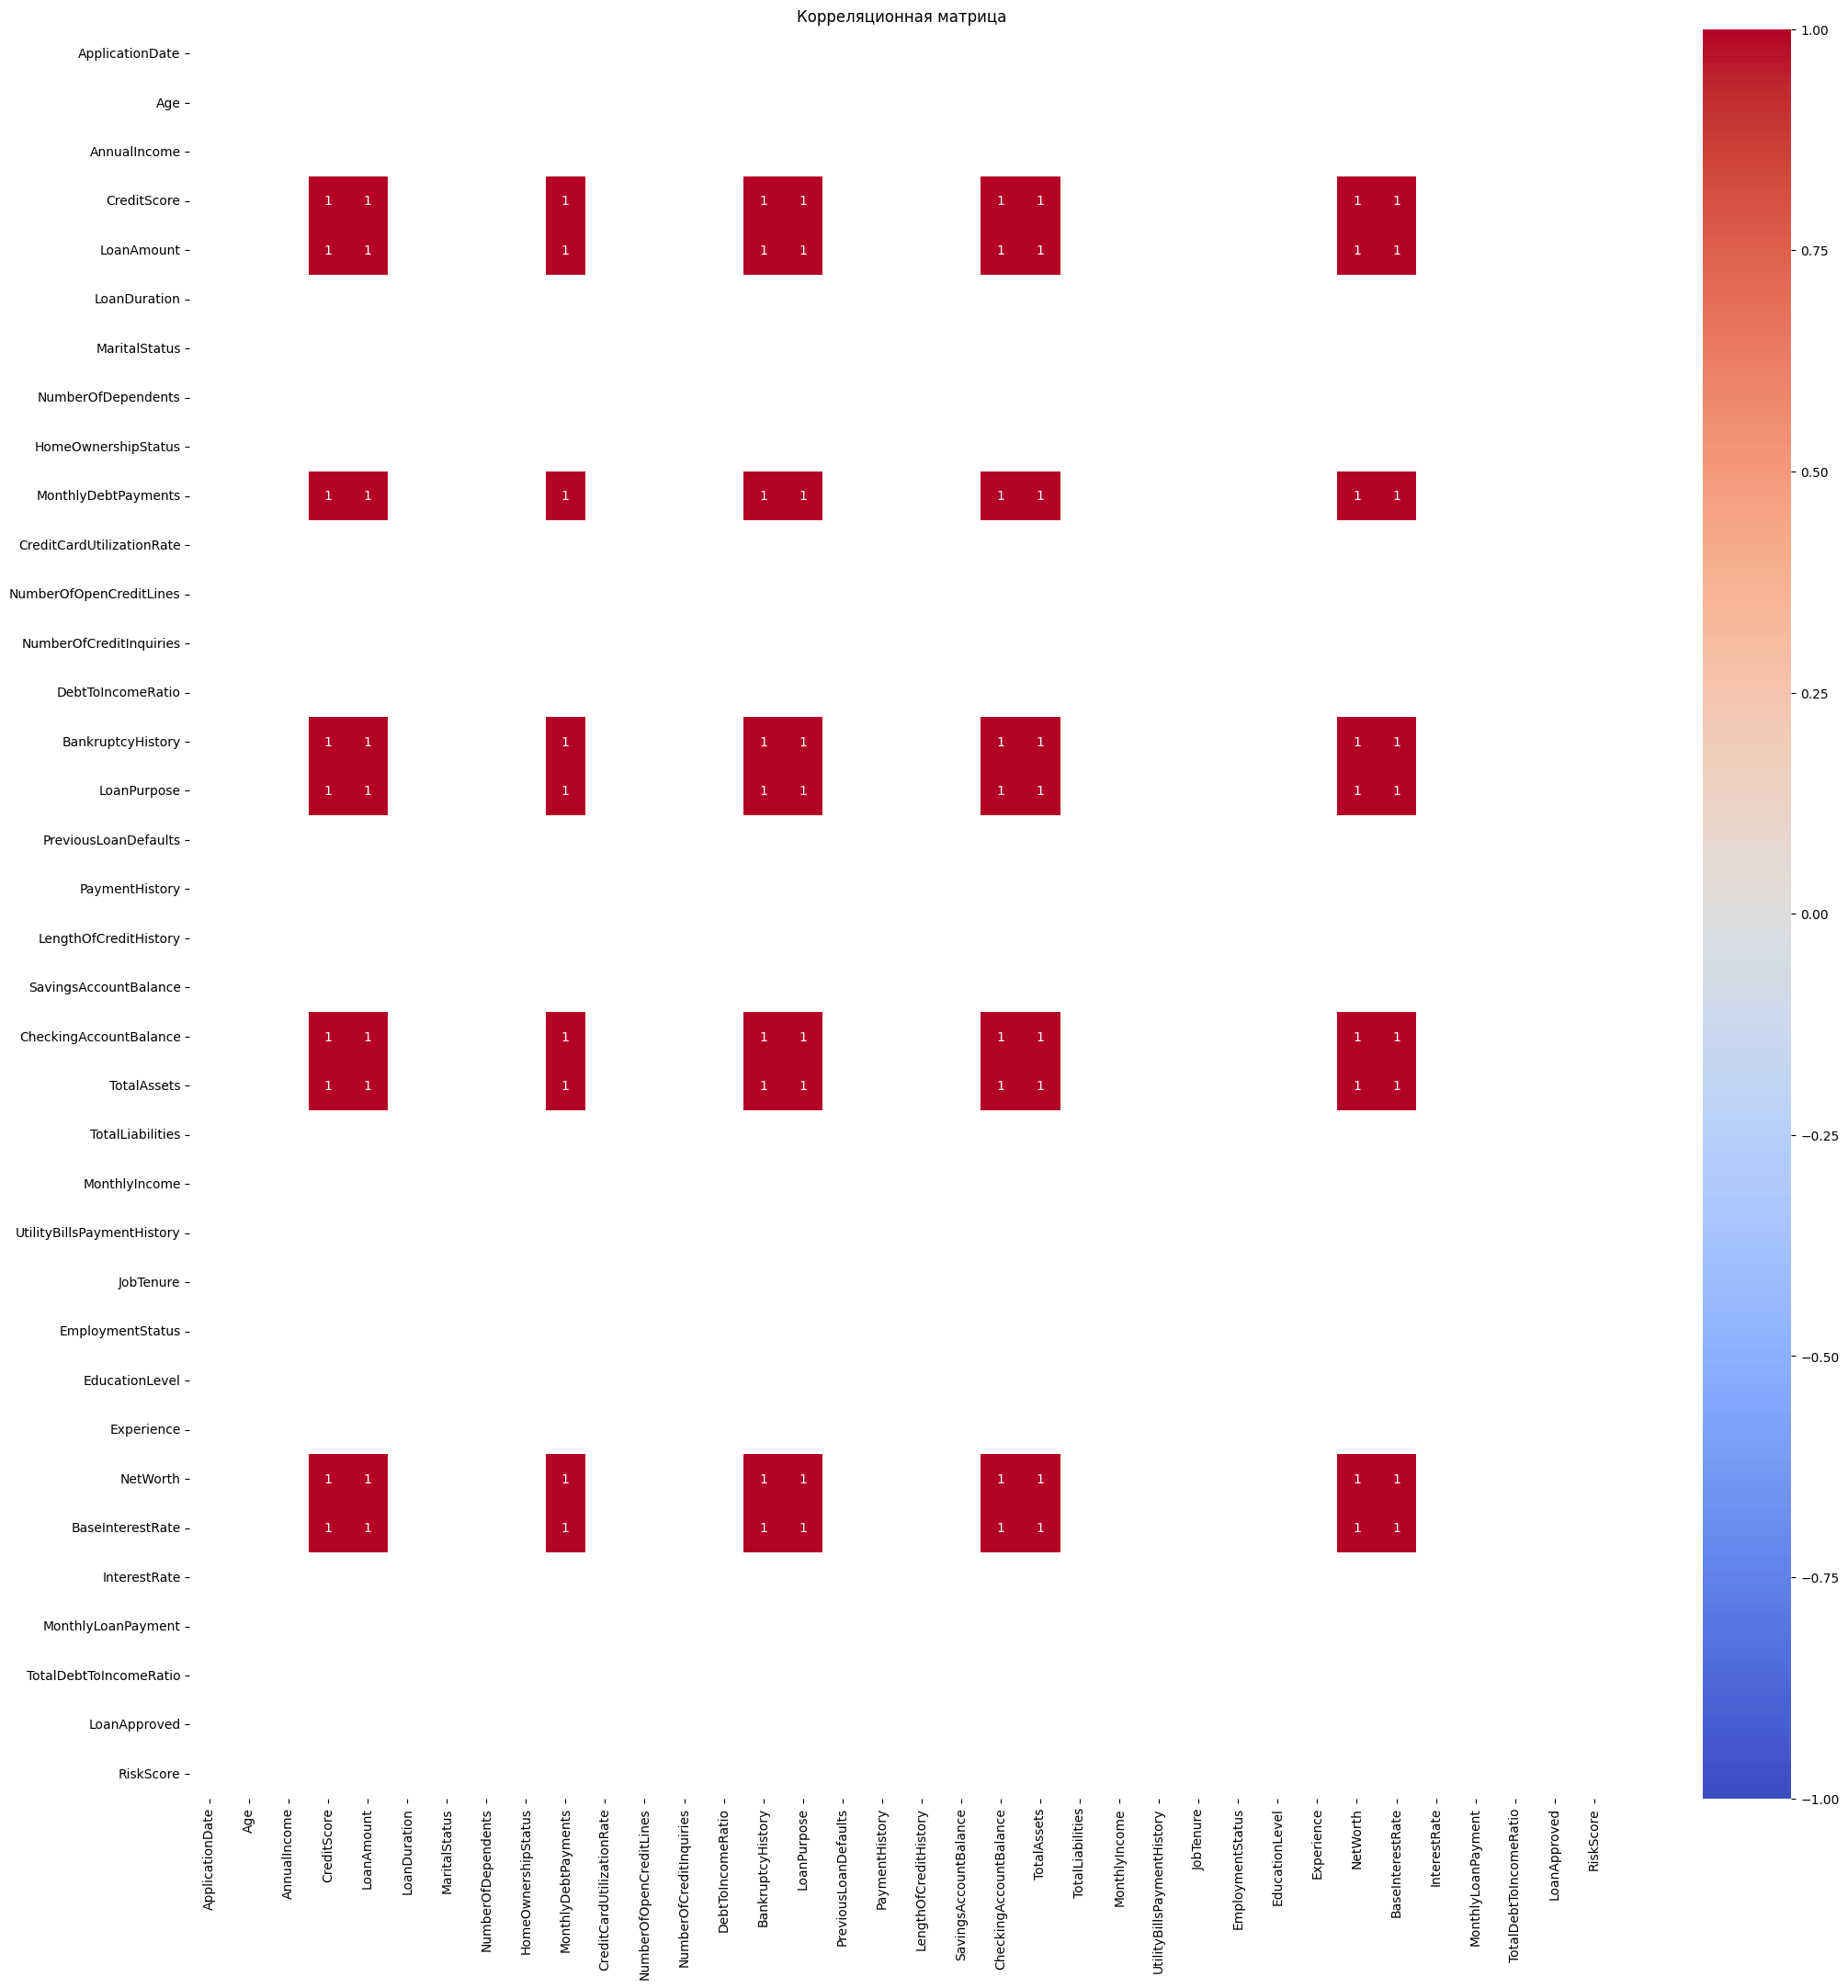

In [174]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.dropna(subset=['ApplicationDate']).isnull().corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

В качетстве решения можно удалить все полностью или частично пустые строки (или же также можно предсказать значения некоторых признаков на коррелирующими с ними признаками, но тогда будет появляться линейная зависимость => придется удалять в любом случае)

In [175]:
Not_null_data = data.dropna().drop_duplicates() #Заодно и избавимся от дубликатов
Not_null_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9529 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9529 non-null   object 
 1   Age                         9529 non-null   float64
 2   AnnualIncome                9529 non-null   float64
 3   CreditScore                 9529 non-null   float64
 4   LoanAmount                  9529 non-null   float64
 5   LoanDuration                9529 non-null   float64
 6   MaritalStatus               9529 non-null   object 
 7   NumberOfDependents          9529 non-null   float64
 8   HomeOwnershipStatus         9529 non-null   object 
 9   MonthlyDebtPayments         9529 non-null   float64
 10  CreditCardUtilizationRate   9529 non-null   float64
 11  NumberOfOpenCreditLines     9529 non-null   float64
 12  NumberOfCreditInquiries     9529 non-null   float64
 13  DebtToIncomeRatio           9529 non-n

Посмотрим на описание таргет значения:

In [176]:
Not_null_data[['RiskScore']].describe(percentiles=[0.01, 0.03, 0.1, 0.5, 0.75, 0.90, 0.97, 0.99])

,RiskScore
count,9.529000e+03
mean,-3.458380e+04
std,1.437496e+06
min,-9.999999e+06
1%,-9.999999e+06
3%,2.432340e+01
10%,2.830098e+01
50%,4.401980e+01
75%,6.526522e+01
90%,7.256024e+01


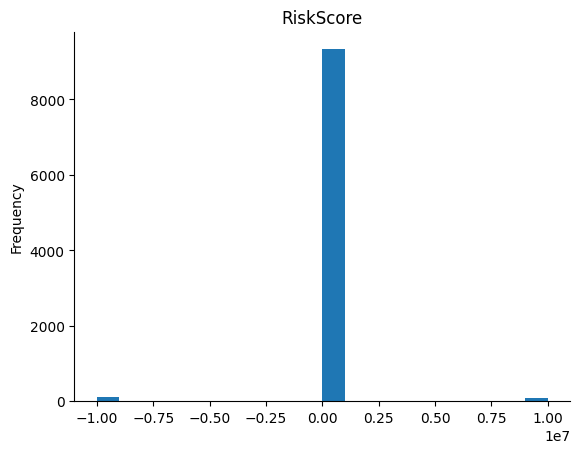

In [177]:
Not_null_data['RiskScore'].plot(kind='hist', bins=20, title='RiskScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

Видно, что в краевых случаях (>99% || <1%) видны вбросы.

In [178]:
Not_null_data = Not_null_data[Not_null_data['RiskScore'] > Not_null_data['RiskScore'].quantile(q=0.01)]
Not_null_data = Not_null_data[Not_null_data['RiskScore'] < Not_null_data['RiskScore'].quantile(q=0.99)]

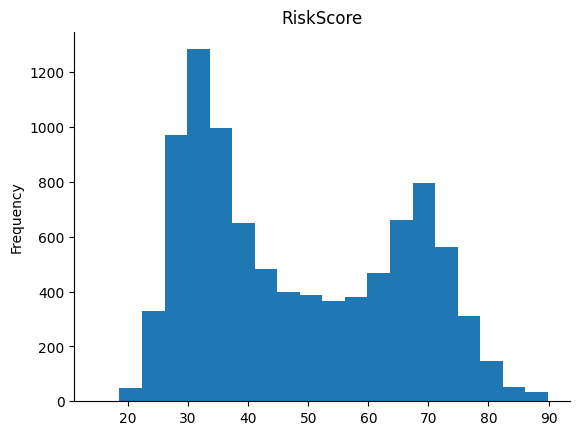

In [179]:
Not_null_data['RiskScore'].plot(kind='hist', bins=20, title='RiskScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

Заметны два основных пика на значениях в 30 и 70 процентов (=> видны две главные категории желающих взять кредит - с низким кредитным риском и высоким кредитным риском - в зависимости от их признаков)

Посмотрим на описание остальных признаков:

In [180]:
Not_null_data.describe() #Каких то очевидных вбросов не видно

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,...,9319.000000,9319.000000,9319.000000,9.319000e+03,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000
mean,39.876060,131803.106878,678.348964,29803.523232,53.374826,1.567228,547.184891,0.284877,3.031334,0.980041,...,0.783896,4.950960,17.647924,1.528397e+05,0.200108,0.199762,1072.175182,0.510388,0.513896,48.249944
std,11.578979,116025.196116,175.160576,27328.438588,24.417001,1.418140,503.700465,0.159386,1.740052,0.988140,...,0.123653,2.207924,11.312105,4.564261e+05,0.094085,0.096131,1309.231970,0.845720,0.499834,17.173265
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000,14.841417
25%,32.000000,21253.500000,550.000000,12621.000000,36.000000,0.000000,234.000000,0.159530,2.000000,0.000000,...,0.707246,3.000000,9.000000,7.302500e+03,0.119850,0.119570,374.687398,0.066393,0.000000,32.690809
50%,40.000000,89256.000000,723.000000,21801.000000,48.000000,1.000000,399.000000,0.263275,3.000000,1.000000,...,0.803878,5.000000,17.000000,2.761000e+04,0.181826,0.180252,684.665480,0.177859,1.000000,44.098093
75%,48.000000,257636.500000,850.000000,37157.000000,60.000000,3.000000,687.000000,0.391635,4.000000,2.000000,...,0.878921,6.000000,26.000000,1.233475e+05,0.264208,0.264598,1282.264970,0.636333,1.000000,65.010362
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000,89.877839


Интересно посмотреть на зависимость между месячным доходом и суммой кредита:

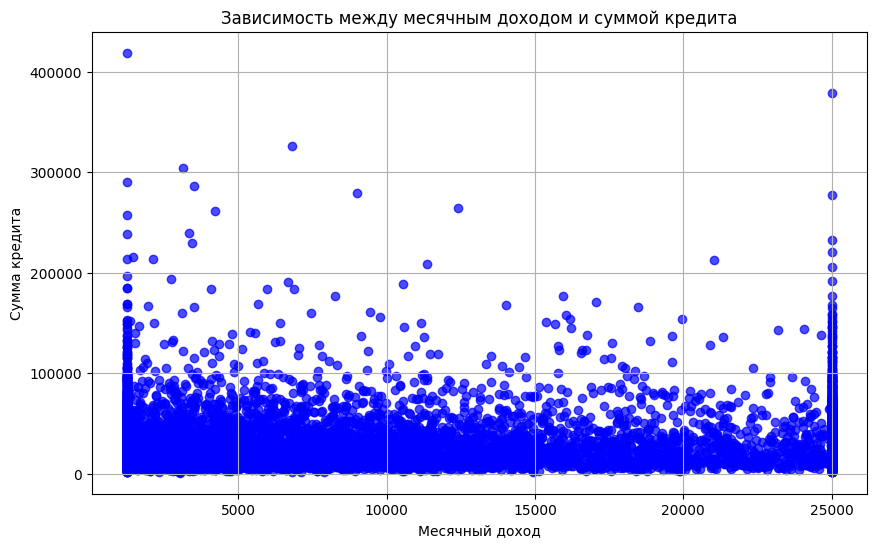

In [181]:
plt.figure(figsize=(10, 6))
plt.scatter(Not_null_data['MonthlyIncome'], Not_null_data['LoanAmount'], color='blue', alpha=0.7)
plt.title('Зависимость между месячным доходом и суммой кредита')
plt.xlabel('Месячный доход')
plt.ylabel('Сумма кредита')
plt.grid(True)
plt.show()

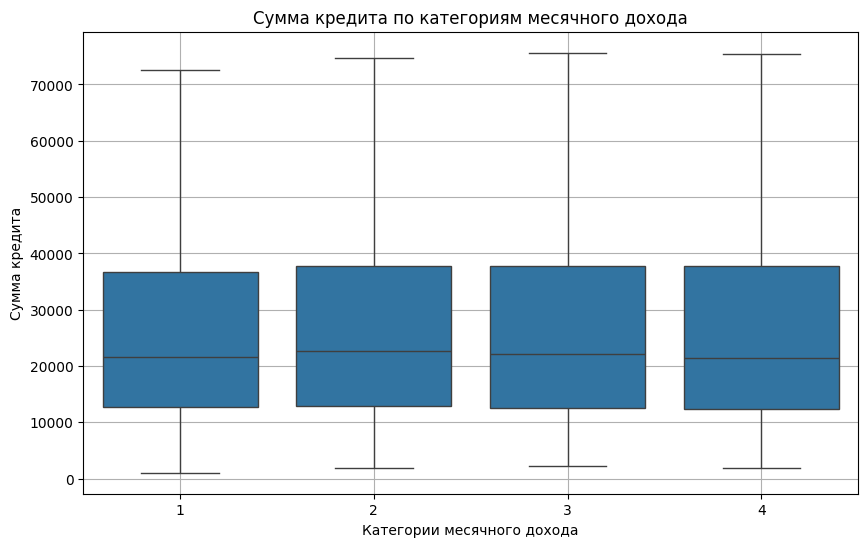

In [182]:
def categorize_income(income):
    if income < 7500:
        return 1
    elif 7500 <= income < 15000:
        return 2
    elif 15000 <= income < 22500:
        return 3
    else:
        return 4

Not_null_data['income_category'] = Not_null_data['MonthlyIncome'].apply(categorize_income)

plt.figure(figsize=(10, 6))

sns.boxplot(data=Not_null_data, y="LoanAmount", x="income_category", showfliers=False)

Not_null_data.drop(['income_category'], axis=1, inplace = True)

plt.title('Cумма кредита по категориям месячного дохода')
plt.suptitle('')
plt.xlabel('Категории месячного дохода')
plt.ylabel('Сумма кредита')
plt.grid(True)
plt.show()

Видно, что несмотря на категорию дохода, люди чаще всего берут кредиты на одни и те же суммы между данными группами.

Также интересна зависимость между апрувнутым кредитом и его процентом (видно из дальнейшей корреляционной матрицы)

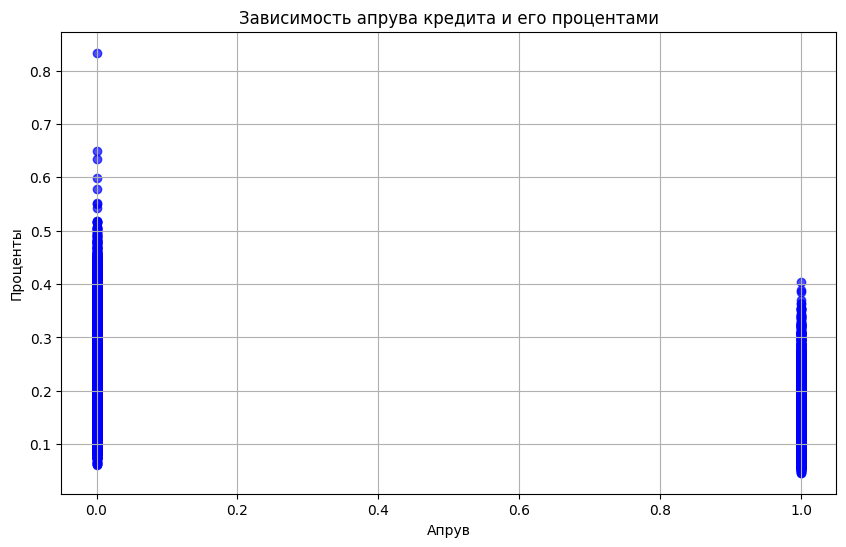

In [183]:
plt.figure(figsize=(10, 6))
plt.scatter(Not_null_data['LoanApproved'], Not_null_data['InterestRate'], color='blue', alpha=0.7)
plt.title('Зависимость апрува кредита и его процентами')
plt.xlabel('Апрув')
plt.ylabel('Проценты')
plt.grid(True)
plt.show()

Видно, что по некоторым причинам кредиты с слишком высокими процентами не особо любят апрувать (возможно из-за риска невозврата)

Проанализируем значения не числовых объектов для их дальнейшей обработки:

In [184]:
object_columns = data.select_dtypes(include=['object']).columns
object_columns

Index(['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus',
       'LoanPurpose', 'EmploymentStatus', 'EducationLevel'],
      dtype='object')

In [185]:
for column in object_columns:
    print(f'{column}: {data[column].unique()}')

ApplicationDate: ['2010-06-26' '1996-09-23' '2015-01-19' ... '2010-11-07' '2001-12-28' nan]
MaritalStatus: ['Divorced' 'Widowed' 'Married' 'Single' nan]
HomeOwnershipStatus: ['Rent' 'Mortgage' 'Other' 'Own' nan]
LoanPurpose: ['Education' 'Home' 'Debt Consolidation' 'Auto' 'Other' nan]
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed' nan]
EducationLevel: ['Associate' 'High School' 'Bachelor' 'Master' 'Doctorate' nan]


Видно, что такие колонки как EducationLevel и EmploymentStatus можно преобразовать при помощи label encoding`а, т.к. представляют собой более менее последовательные множества. Остальные признаки лучше закодировать и как-либо преобразовать их в числовые данные (например в boolean при помощи one-hot encoding или числа при помощи target-encoding)

Преобразуем категориальные признаки на этой основе:

In [186]:
copy_data = Not_null_data.copy()
copy_data['EmploymentStatus'] = LabelEncoder().fit_transform(copy_data['EmploymentStatus'])
copy_data['EducationLevel'] = LabelEncoder().fit_transform(copy_data['EducationLevel'])

copy_data['MaritalStatus'] = TargetEncoder().fit_transform(
    copy_data['MaritalStatus'].values.reshape(-1, 1),
    copy_data['RiskScore'].values
    )

copy_data['HomeOwnershipStatus'] = TargetEncoder().fit_transform(
     copy_data['HomeOwnershipStatus'].values.reshape(-1, 1),
     copy_data['RiskScore'].values
     )

copy_data['LoanPurpose'] = TargetEncoder().fit_transform(
     copy_data['LoanPurpose'].values.reshape(-1, 1),
     copy_data['RiskScore'].values
     )

In [187]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9319 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9319 non-null   object 
 1   Age                         9319 non-null   float64
 2   AnnualIncome                9319 non-null   float64
 3   CreditScore                 9319 non-null   float64
 4   LoanAmount                  9319 non-null   float64
 5   LoanDuration                9319 non-null   float64
 6   MaritalStatus               9319 non-null   float64
 7   NumberOfDependents          9319 non-null   float64
 8   HomeOwnershipStatus         9319 non-null   float64
 9   MonthlyDebtPayments         9319 non-null   float64
 10  CreditCardUtilizationRate   9319 non-null   float64
 11  NumberOfOpenCreditLines     9319 non-null   float64
 12  NumberOfCreditInquiries     9319 non-null   float64
 13  DebtToIncomeRatio           9319 non-n

На данном графике рассотрим зависимости признаков друг от друга:

In [188]:
corr_matrix = copy_data.drop(['ApplicationDate', 'RiskScore'], axis=1).corr()

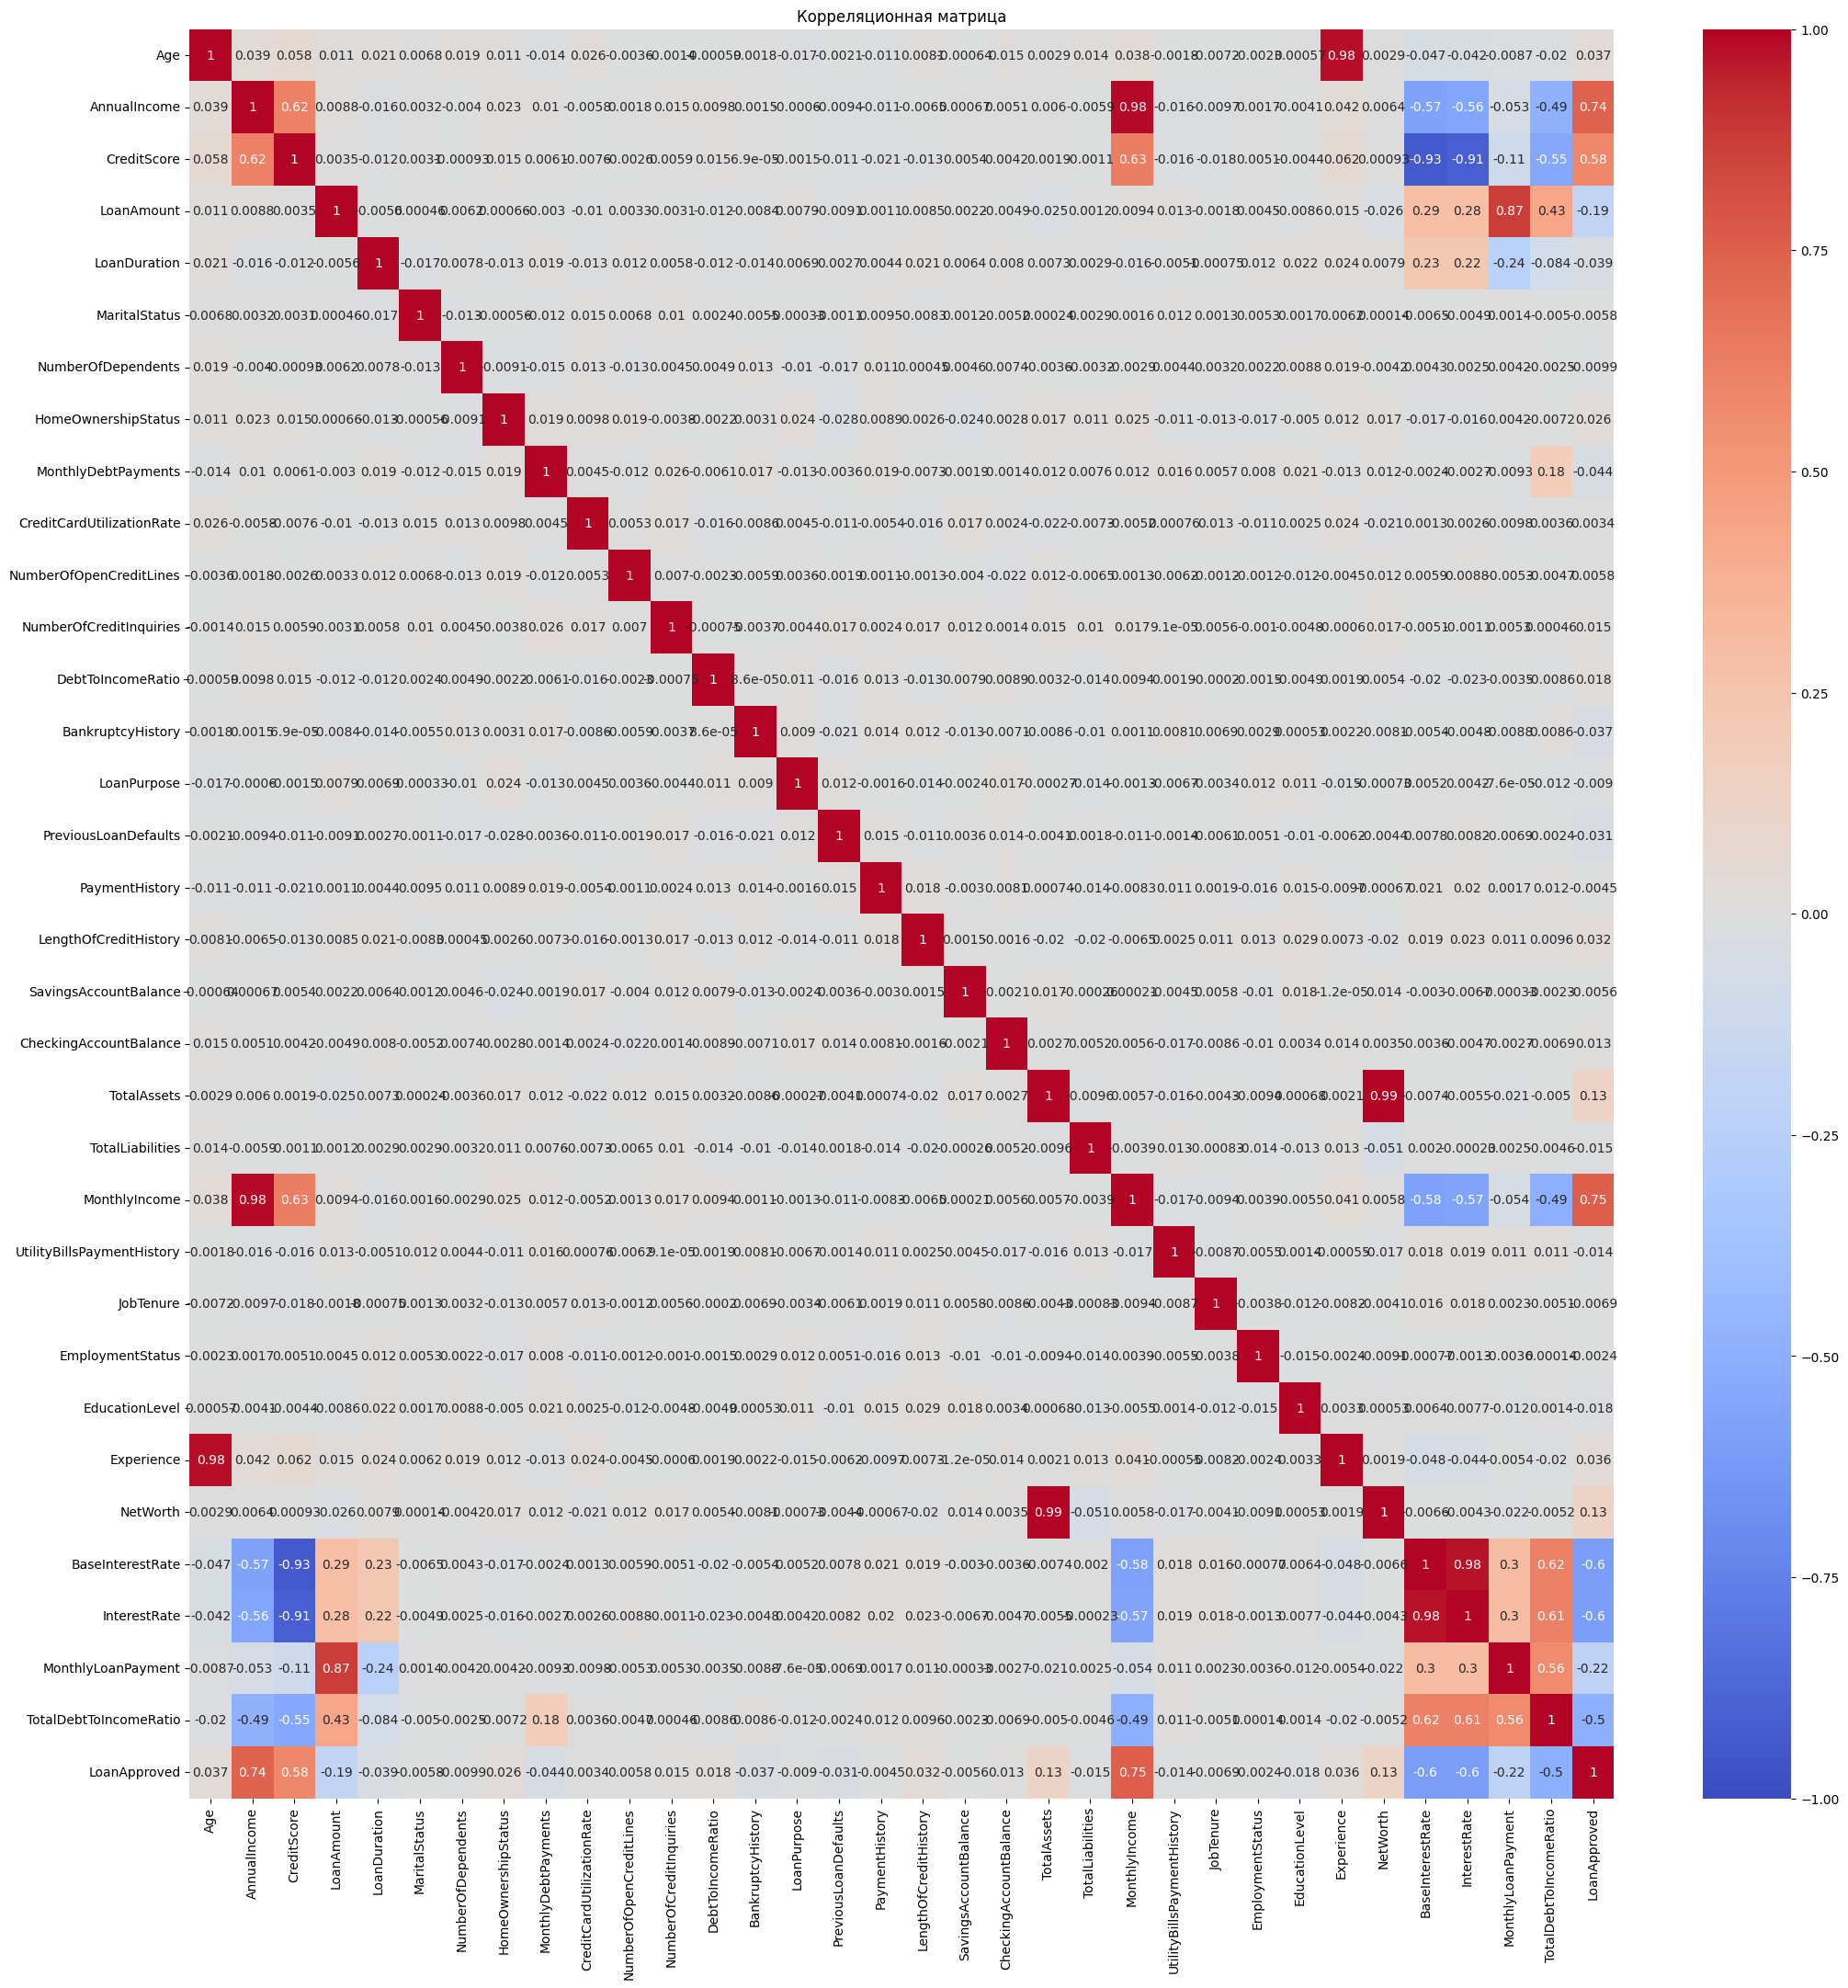

In [189]:
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

Из данного графика можно выявить список ЛН признаков, которые можно удалить: 'Experience', 'NetWorth', 'BaseInterestRate', 'MonthlyIncome', 'MonthlyLoanPayment' (корреляция > 0.75)

In [190]:
Not_null_data.drop(['Experience', 'NetWorth', 'BaseInterestRate', 'MonthlyIncome', 'MonthlyLoanPayment'], axis=1, inplace=True)

# Создание модели

Определим метрики для оценивания моделей:

In [191]:
def getMetrics(y_true, y_pred):

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy
    }

Определим для pipeline`а вышеописанные трансформы:

In [192]:
class TargetEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.te_features = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
        self.te = {}

    def fit(self, X, y=None):

        self.X = X.copy()
        self.y = y.copy()

        for feature in self.te_features:
          self.te[feature] = TargetEncoder()
          self.te[feature].fit(self.X[feature].values.reshape(-1, 1), self.y.values)

        return self

    def transform(self, X):

        self.X = X.copy()
        self.X.reset_index(drop=True, inplace=True)
        for feature in self.te_features:
          self.X[feature] = self.te[feature].transform(self.X[feature].values.reshape(-1, 1))

        return self.X

In [193]:
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.le = {}
        self.le_features = ['EducationLevel', 'EmploymentStatus']

    def fit(self, X, y=None):

        self.X = X.copy()

        for feature in self.le_features:
          self.le[feature] = LabelEncoder()
          self.le[feature].fit(self.X[feature])

        return self

    def transform(self, X):

        self.X = X.copy()

        for feature in self.le_features:
          self.X[feature] = self.le[feature].transform(self.X[feature])

        return self.X

Создание модели:

In [194]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

class LogisticRegressionClassifier:
    def __init__(self, method='logistic', learning_rate=0.01, epochs=1000):

        self.method = method
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):

          linear_model = np.dot(X, self.weights) + self.bias

          if self.method == 'linear':

              y_predicted = linear_model

              dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
              db = (1 / n_samples) * np.sum(y_predicted - y)

          elif self.method == 'logistic':

              y_predicted = self.sigmoid(linear_model)

              dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
              db = (1 / n_samples) * np.sum(y_predicted - y)

          self.weights -= self.learning_rate * dw
          self.bias -= self.learning_rate * db


    def predict(self, X):

        linear_model = np.dot(X, self.weights) + self.bias

        if self.method == 'linear':
            return np.where(linear_model >= 0.5, 1, 0)
        elif self.method == 'logistic':
            y_predicted = self.sigmoid(linear_model)
            return np.where(y_predicted >= 0.5, 1, 0)

# Тестирование моделей

Определим тренировочные и тестовые датасеты:

In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    Not_null_data.drop(['ApplicationDate', 'LoanApproved'], axis=1),
    Not_null_data['LoanApproved'],
    test_size=0.2,
    random_state=42
) #В test.csv нету RiskScore, который сильно коррелирует с LoanApproved, поэтому не можем его взять

Тренировка, предсказание и оценивание(method='logistic'):

Evaluation Metrics:
Accuracy: 0.9452789699570815
Precision: 0.9382470119521913
Recall: 0.9592668024439919
F1-score: 0.9486404833836858


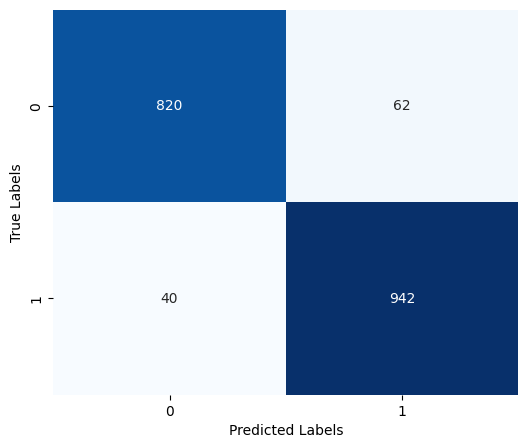

In [196]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', LogisticRegressionClassifier())
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Тренировка, предсказание и оценивание(method='linear'):

Evaluation Metrics:
Accuracy: 0.9828326180257511
Precision: 0.9807692307692307
Recall: 0.9867617107942973
F1-score: 0.983756345177665


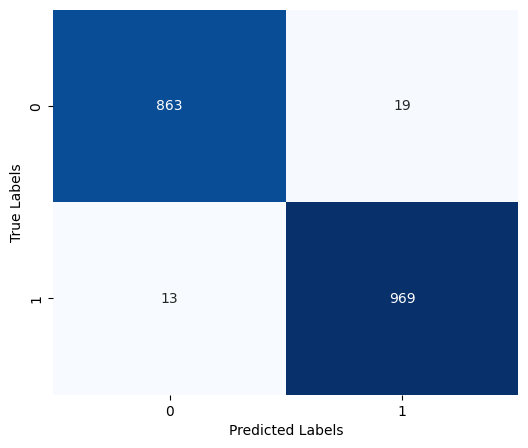

In [197]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', LogisticRegressionClassifier(method='linear'))
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Тренировка, предсказание и оценивание готовых моделей:

Evaluation Metrics:
Accuracy: 0.9892703862660944
Precision: 0.9848790322580645
Recall: 0.994908350305499
F1-score: 0.9898682877406282


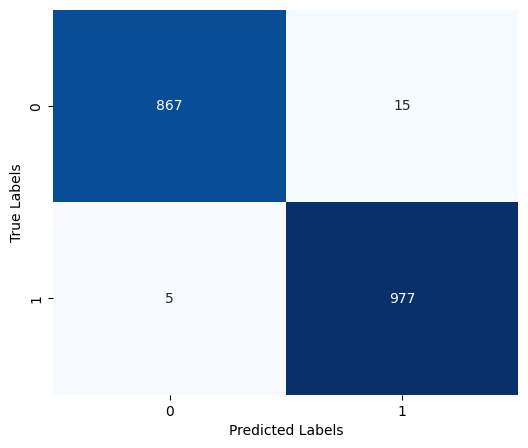

In [198]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Evaluation Metrics:
Accuracy: 0.9898068669527897
Precision: 0.9868554095045501
Recall: 0.9938900203665988
F1-score: 0.9903602232369355


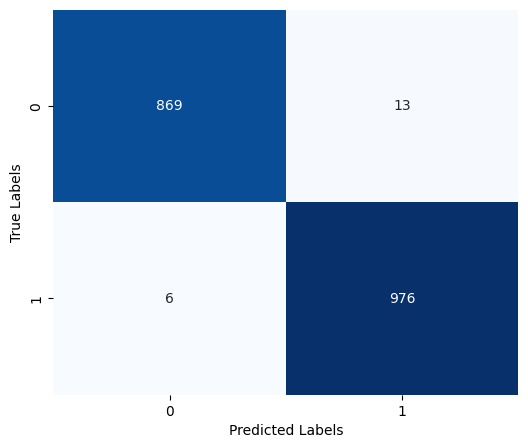

In [199]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', SVC())
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Evaluation Metrics:
Accuracy: 0.98068669527897
Precision: 0.9826530612244898
Recall: 0.9806517311608961
F1-score: 0.981651376146789


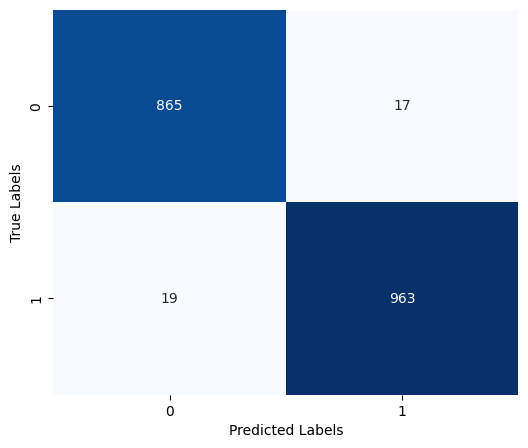

In [200]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Evaluation Metrics:
Accuracy: 0.9828326180257511
Precision: 0.9837067209775967
Recall: 0.9837067209775967
F1-score: 0.9837067209775967


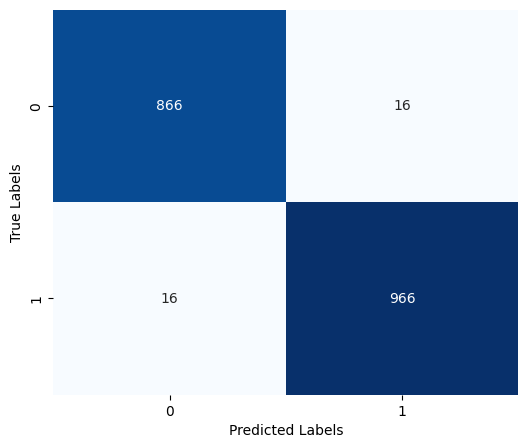

In [201]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Evaluation Metrics:
Accuracy: 0.990343347639485
Precision: 0.9928425357873211
Recall: 0.9887983706720977
F1-score: 0.9908163265306122


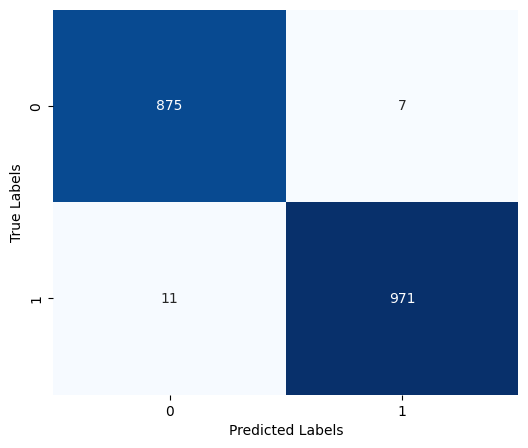

In [202]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

[LightGBM] [Info] Number of positive: 3807, number of negative: 3648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3767
[LightGBM] [Info] Number of data points in the train set: 7455, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510664 -> initscore=0.042662
[LightGBM] [Info] Start training from score 0.042662
Evaluation Metrics:
Accuracy: 0.9935622317596566
Precision: 0.9938900203665988
Recall: 0.9938900203665988
F1-score: 0.9938900203665988


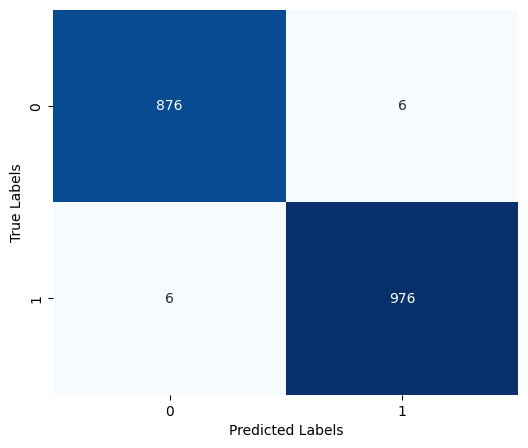

In [203]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', lgb.LGBMClassifier(random_state=42))
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Evaluation Metrics:
Accuracy: 0.9919527896995708
Precision: 0.9928644240570846
Recall: 0.9918533604887984
F1-score: 0.9923586347427407


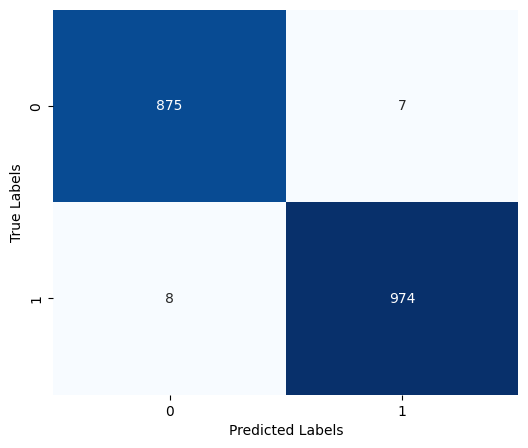

In [204]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Evaluation Metrics:
Accuracy: 0.996244635193133
Precision: 0.9969418960244648
Recall: 0.9959266802443992
F1-score: 0.9964340295466123


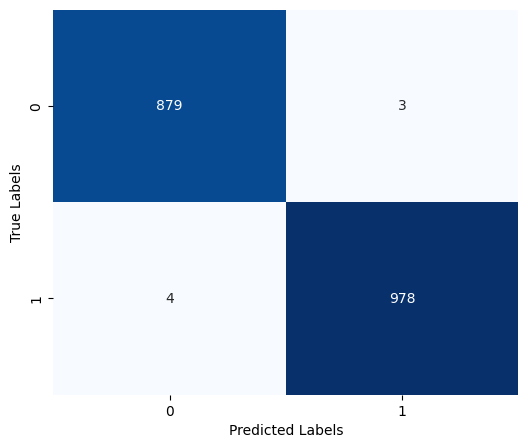

In [205]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', CatBoostClassifier(random_state=42, verbose=0))
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Evaluation Metrics:
Accuracy: 0.9297210300429185
Precision: 0.9087415946205571
Recall: 0.9633401221995926
F1-score: 0.935244686109738


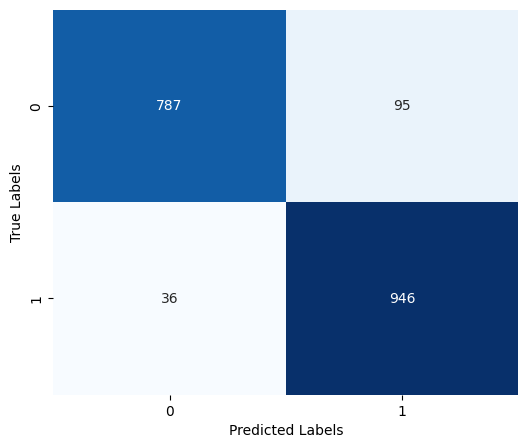

In [206]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=42))
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Evaluation Metrics:
Accuracy: 0.9393776824034334
Precision: 0.9280788177339901
Recall: 0.9592668024439919
F1-score: 0.943415122684026


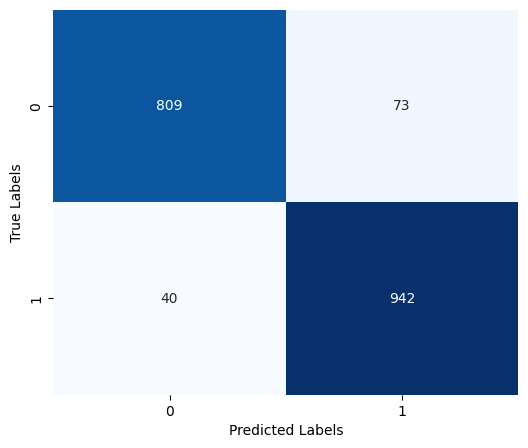

In [207]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluation Metrics:
Accuracy: 0.996244635193133
Precision: 0.9989764585465711
Recall: 0.9938900203665988
F1-score: 0.9964267483409903


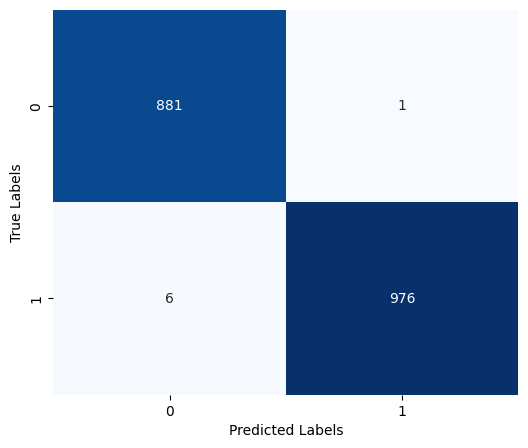

In [208]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', AdaBoostClassifier(random_state=42, n_estimators=100))
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Evaluation Metrics:
Accuracy: 0.9881974248927039
Precision: 0.9878048780487805
Recall: 0.9898167006109979
F1-score: 0.9888097660223805


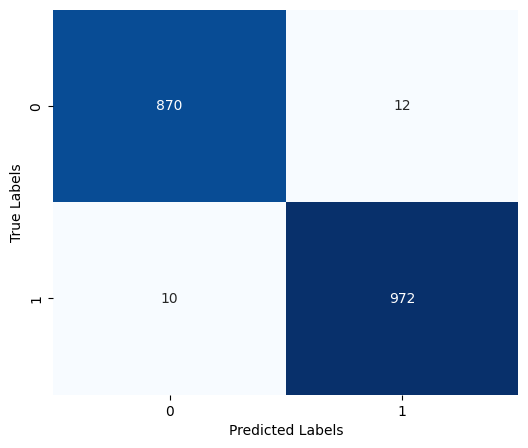

In [209]:
pipeLine = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),
    ('target_encoder', TargetEncoderTransformer()),
    ('scaler', StandardScaler()),
    ('model', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('dt', DecisionTreeClassifier(random_state=42)),
            ('rf', RandomForestClassifier(random_state=42))
        ],
        voting='hard'
    ))
])
pipeLine.fit(X_train, y_train)

y_test_pred = pipeLine.predict(X_test)

metrics = getMetrics(y_test, y_test_pred)
print("Evaluation Metrics:")
print("Accuracy:", metrics['accuracy'])
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1-score:", metrics['f1_score'])

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Выводы

**Результаты моделей:**

При помощи метрик, полученных при оценке каждой модели, можно сделать следующие выводы:

- Анализ самописной реализации:

  Реализация линейного классификатора и логистической регресссии показала нелохой результат по сравнению с готовыми моделями на основе F1-score метрике: 0.9838 и 0.9486 соответсвенно.

- Модели с наилучшими производительностью:
  - CatBoostClassifier - F1-score = 0.9964
  - AdaBoostClassifier - F1-score = 0.9964
  - LGBMClassifier - F1-score = 0.9939
  
  Эти модели неизменно обеспечивали высокую точность и отзывчивость, что свидетельствует об их надежности при выполнении задачи бинарной классификации набора данных. Можно также заметить, что более сожные модели на основе бустинга выдавали самые лучшие результаты.

- Voting классификатор:

 Классификатор голосования с использованием гиперпараметра жесткого голосования показал средние/хорошие результаты, набрав 0.9888 баллов по метрике F1-score. Скорее всего можно получить более лучшие результаты, правильно подобрав более хорошие гиперпараметры внутренних моделей. Но даже несмотря на это видно улучшение благодаря испольсованию различных моделей вместе.

- Наивные модели:

 KNeighborsClassifier и GaussianNB показали одни из самых низких показателей среди всех моделей. Их F1-score метрики соответсвенно равны 0.9352 и 0.9434. Это показывает их ограничения в агрегации сложных связей между данными.

- Лесные модели:

 Решаюшее дерево и случайный лес показали хорошие результаты на основе F1-score: 0.9806 и 0.9842 соответственно. Хоть случайные лес и показывает хорошую сбалансированность, но они оба не дотягивают по показателям до более сложных моделей.

- Остальные модели:

 LogisticRegression и SVC показали хорошие результаты 0.9899 и 0.9904 соответственно по F1-score метрике. Эти модели также показали отличные показатели и среди других метрик, тем самым продемонстрировав свою эффективность и точность среди всех моделей.


**Самая информативная метрика:**

Наиболее информативной метрикой можно назвать F1-score, так как она основывается на балансе между precision и recall. В случае одобрения кредита это особенно важно, потому что позволяет комплексно оценить количество выдаваемых кредитов и их возвратов.

**Общий вывод:**

Была написана собственная пользовательская реализация моделей логической регрессии и линейного классификатора, а также проведено сравнение с готовыми реализациями на основе посчитанных метрик. Можно заметить, что модели, которые в своем исполнении используют алгоритмы бустинга (LightGBM, XGBoost и CatBoost), а также AdaBoostClassifier показали наилучшие результаты, так как они способны итеративно уменьшать количество ошибок и адаптироваться к более сложным структурированным данным.

